In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os, uuid
from azure.identity import DefaultAzureCredential
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient
from io import BytesIO
warnings.filterwarnings('ignore')
sns.set()

In [71]:
connect_str = os.getenv('AZURE_STORAGE_CONNECTION_STRING')
blob_service_client = BlobServiceClient.from_connection_string(connect_str)
container_client = blob_service_client.get_container_client("data")

In [72]:
def download_blob_to_df(blob_name):
    blob_client = container_client.get_blob_client(blob_name)
    download_stream = blob_client.download_blob()
    blob_data = BytesIO(download_stream.readall())
    return pd.read_csv(blob_data)

In [73]:
humanForYou = download_blob_to_df("HumanForYou_datas.csv")

In [74]:
humanForYou.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AttendanceScore
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3,3,3.0,4.0,2.0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,2,4,3.0,2.0,4.0,42
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,3,3,2.0,2.0,1.0,0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,2,3,4.0,4.0,3.0,0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,3,3,4.0,1.0,3.0,115


In [75]:
# Suppression des valeurs non éthiques

humanForYouCopy = humanForYou.copy()

humanForYouCopy.drop("Age", axis=1, inplace=True)
humanForYouCopy.drop("Over18", axis=1, inplace=True)
humanForYouCopy.drop("Gender", axis=1, inplace=True)
humanForYouCopy.drop("MaritalStatus", axis=1, inplace=True)

In [76]:
humanForYouCopy.describe()

,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AttendanceScore
count,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.687528,15.209524,8.0,0.793878,...,2.799320,7.008163,2.187755,4.123129,2.729932,3.153741,2.725170,2.729478,2.763492,76.167574
std,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.495967,3.659108,0.0,0.851883,...,1.288978,6.125135,3.221699,3.567327,0.711400,0.360742,1.089852,1.098904,0.703541,100.022045
min,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,...,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,0.000000
50%,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,...,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000
75%,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,...,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000,4.000000,4.000000,3.000000,205.000000
max,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,...,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,248.000000


In [77]:
# Suppression des valeurs inutiles
humanForYouCopy.drop("EmployeeCount", axis=1, inplace=True)
humanForYouCopy.drop("EmployeeID", axis=1, inplace=True)

array([[<Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'StandardHours'}>],
       [<Axes: title={'center': 'StockOptionLevel'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>,
        <Axes: title={'center': 'TrainingTimesLastYear'}>,
        <Axes: title={'center': 'YearsAtCompany'}>],
       [<Axes: title={'center': 'YearsSinceLastPromotion'}>,
        <Axes: title={'center': 'YearsWithCurrManager'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'PerformanceRating'}>],
       [<Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center

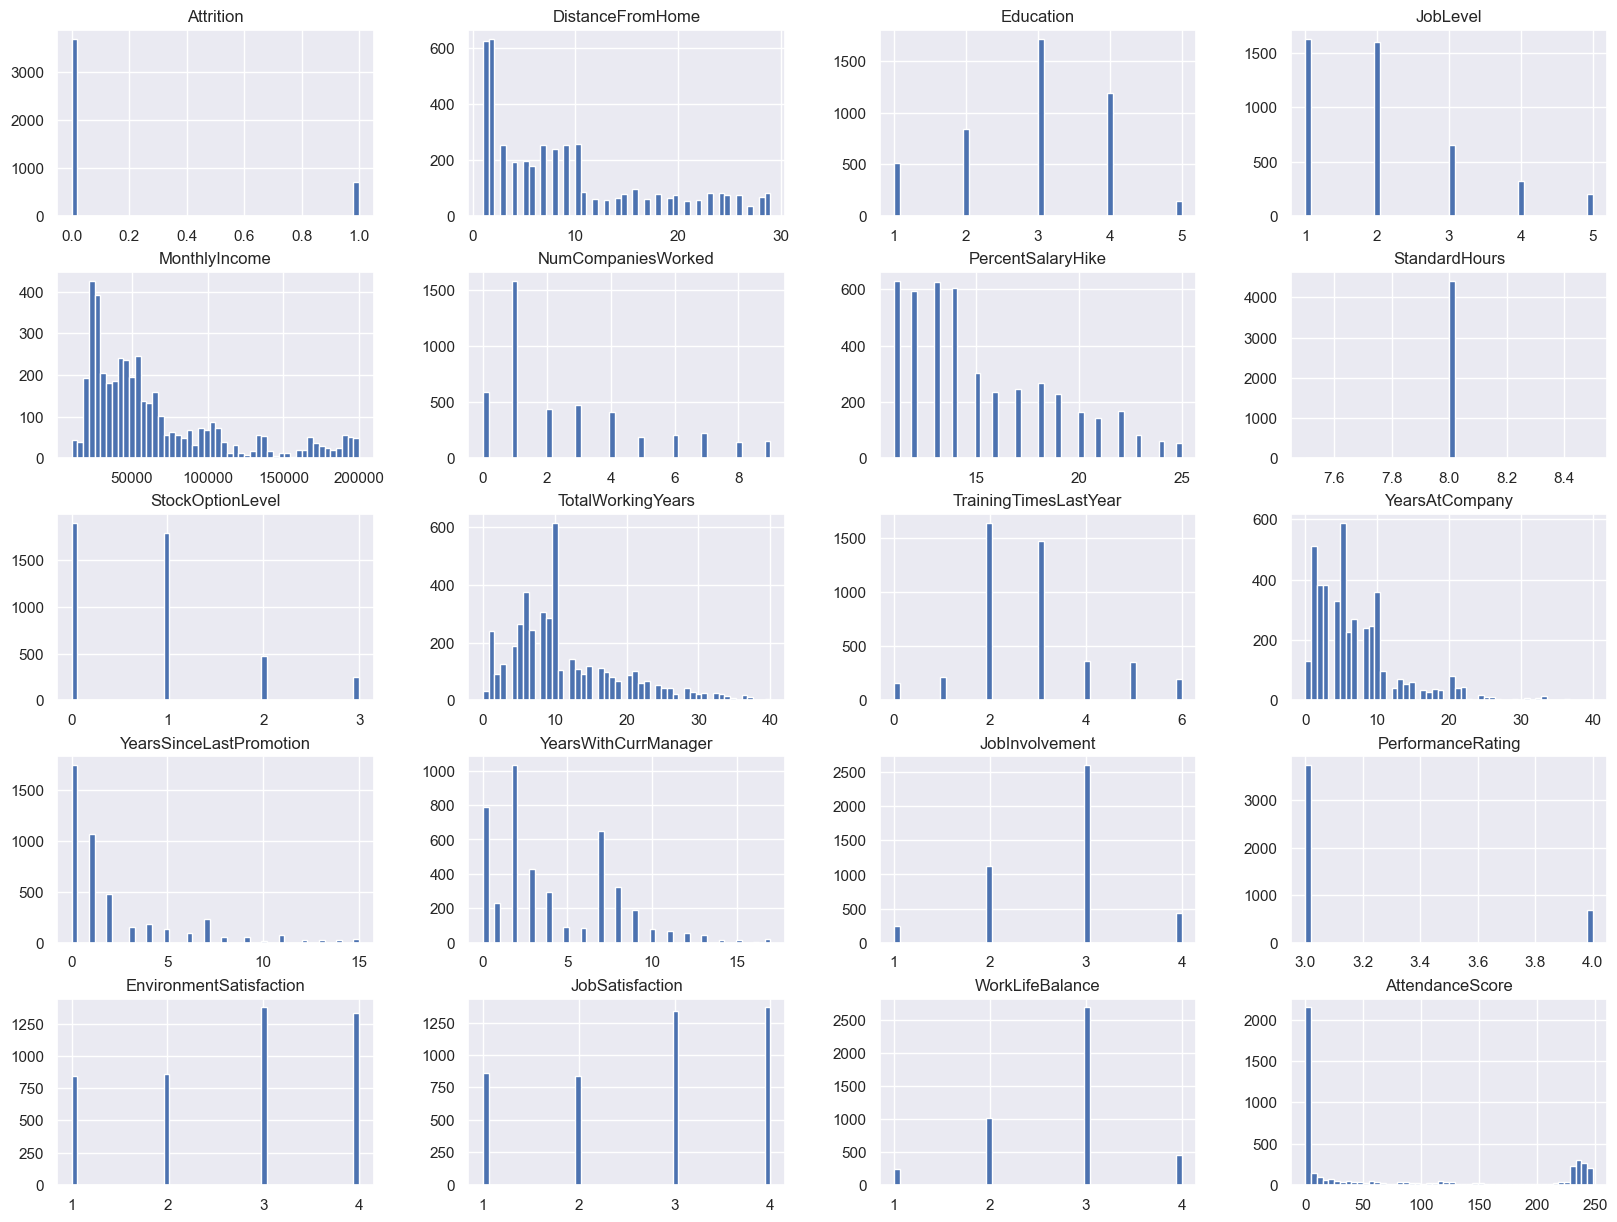

In [78]:
# Histogramme des valeurs
humanForYouCopy["Attrition"] = humanForYouCopy["Attrition"].map({"Yes": 1, "No": 0})
humanForYouCopy.hist(bins=50, figsize=(20, 15))

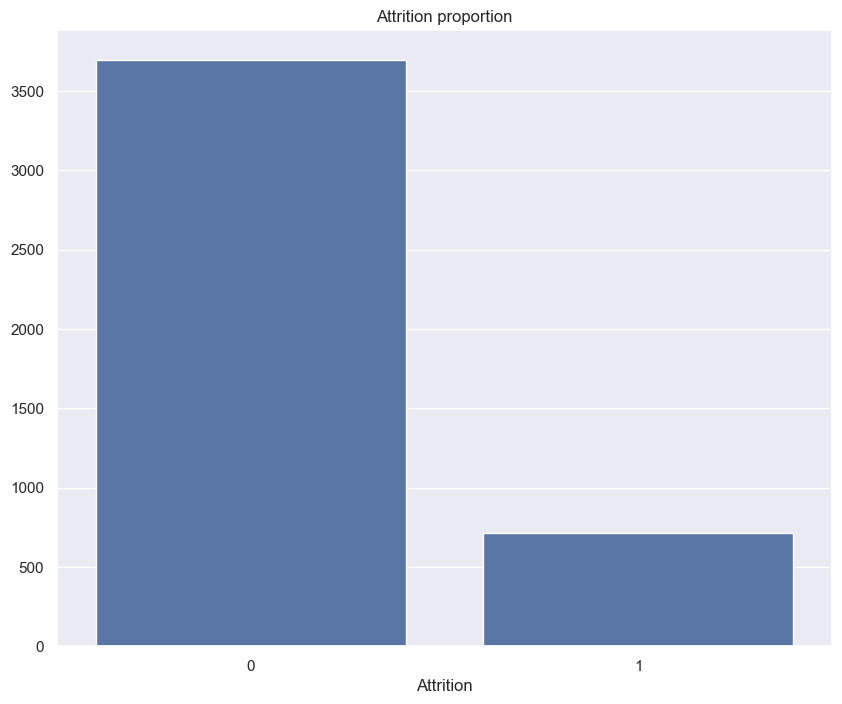

In [79]:
# Proportion des valeurs d'attrition

attrition = humanForYouCopy["Attrition"].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=attrition.index, y=attrition.values)
plt.title("Attrition proportion")
plt.show()

On remarque que la proportion des personnes ayant quitté l'entreprise est bien plus faible que celle des personnes qui y sont restées.

Il y a donc un déséquilibre dans les données. Il faudra donc faire attention à cela lors de la modélisation.

# Encodage des variables

L'encodage de données est une étape essentielle dans le processus de préparation des données. Il s'agit de transformer des données brutes, souvent sous forme textuelle ou catégorielle en données numériques que les algorithmes de machine learning peuvent utiliser.

Dans notre contexte, nous avons plusieurs variables catégorielles comme Department, EducationField, JobRole et BusinessTravel.

Pour que les algorithmes de machine learning puissent utiliser ces données, nous devons les transformer en données numériques. Pour cela, nous allons utiliser l'encodage ordinal qui une technique pour encoder les variables catégorielles en données numériques. L'encodage ordinal prend en compte l'ordre des valeurs des variables catégorielles.

En pratique, cela signifie attribuer des nombres entiers aux catégories selon un certain ordre. Par exemple, pour une variable catégorielle avec les valeurs "A", "B" et "C", l'encodage ordinal pourrait attribuer 1 à "A", 2 à "B" et 3 à "C.

L'utilisation de l'encodage ordinal est particulièrement utile lorsque les données catégorielles ont un ordre naturel qui peut influencer le résultat. Par exemple dans les niveau d'éducation, les valeurs "Bac", "Master" et "PhD" ont un ordre naturel qui peut influencer le résultat.

Dans notre cas, pour ces variables il n'y a pas d'ordre naturel ce qui peut influencer le résultat. Toutefois, ces variables possèdent un nombre limité de catégories ce qui rend acceptable l'utilisation de l'encodage ordinal et nous permet de ne pas avoir à utiliser l'encodage one-hot qui peut augmenter le nombre de colonnes de manière significative.

Pour effectuer l'encodage ordinal, nous allons utiliser la classe OrdinalEncoder de la bibliothèque scikit-learn.

In [80]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

humanForYouCopy["Department"] = encoder.fit_transform(humanForYouCopy[["Department"]])
humanForYouCopy["EducationField"] = encoder.fit_transform(humanForYouCopy[["EducationField"]])
humanForYouCopy["JobRole"] = encoder.fit_transform(humanForYouCopy[["JobRole"]])

La variable BusinessTravel est une variable catégorielle avec trois catégories: "Non-Travel", "Travel_Rarely" et "Travel_Frequently" où l'ordre naturel est important. Nous allons donc utiliser l'encodage ordinal pour cette variable en définissant nous même l'ordre des catégories.

In [81]:
humanForYouCopy["BusinessTravel"] = humanForYouCopy["BusinessTravel"].map({"Non-Travel": 0, "Travel_Rarely": 1, "Travel_Frequently": 2})

In [82]:
humanForYouCopy["PercentSalaryHike"] = humanForYouCopy["PercentSalaryHike"] / 100

humanForYouCopy.drop("StandardHours", axis=1, inplace=True)

In [83]:
humanForYouCopy.head()

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AttendanceScore
0,0,1,2.0,6,2,1.0,1,0.0,131160,1.0,...,6,1,0,0,3,3,3.0,4.0,2.0,0
1,1,2,1.0,10,1,1.0,1,6.0,41890,0.0,...,3,5,1,4,2,4,3.0,2.0,4.0,42
2,0,2,1.0,17,4,4.0,4,7.0,193280,1.0,...,2,5,0,3,3,3,2.0,2.0,1.0,0
3,0,0,1.0,2,5,1.0,3,1.0,83210,3.0,...,5,8,7,5,2,3,4.0,4.0,3.0,0
4,0,1,1.0,10,1,3.0,1,7.0,23420,4.0,...,2,6,0,4,3,3,4.0,1.0,3.0,115


In [84]:
humanForYouCopy = humanForYouCopy.fillna(0)

<Axes: >

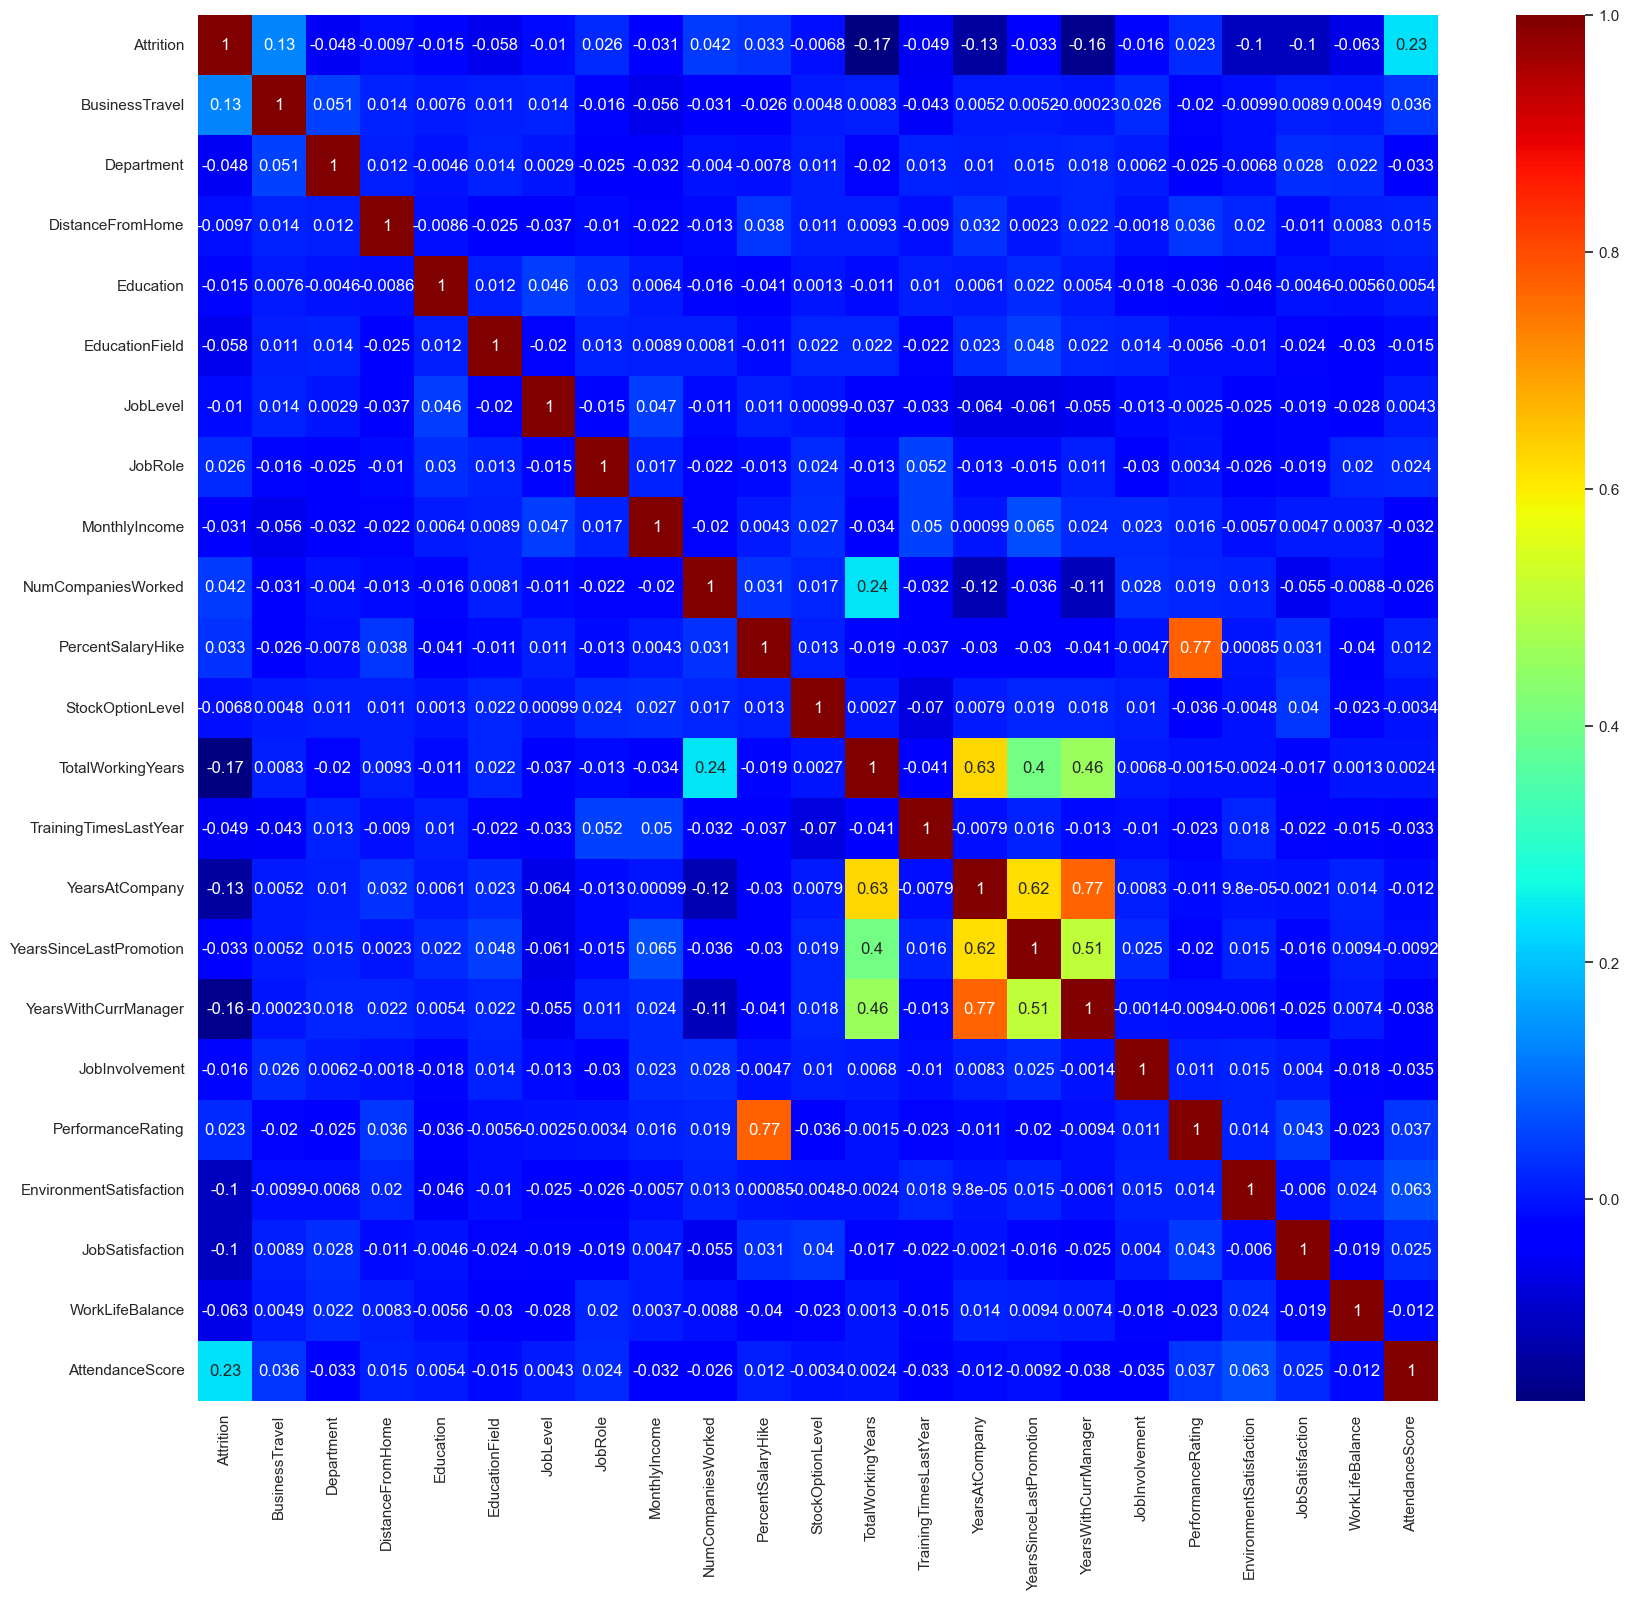

In [85]:
# Visualisation des corrélations

corr_matrix = humanForYouCopy.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap=plt.get_cmap("jet"))



<Axes: >

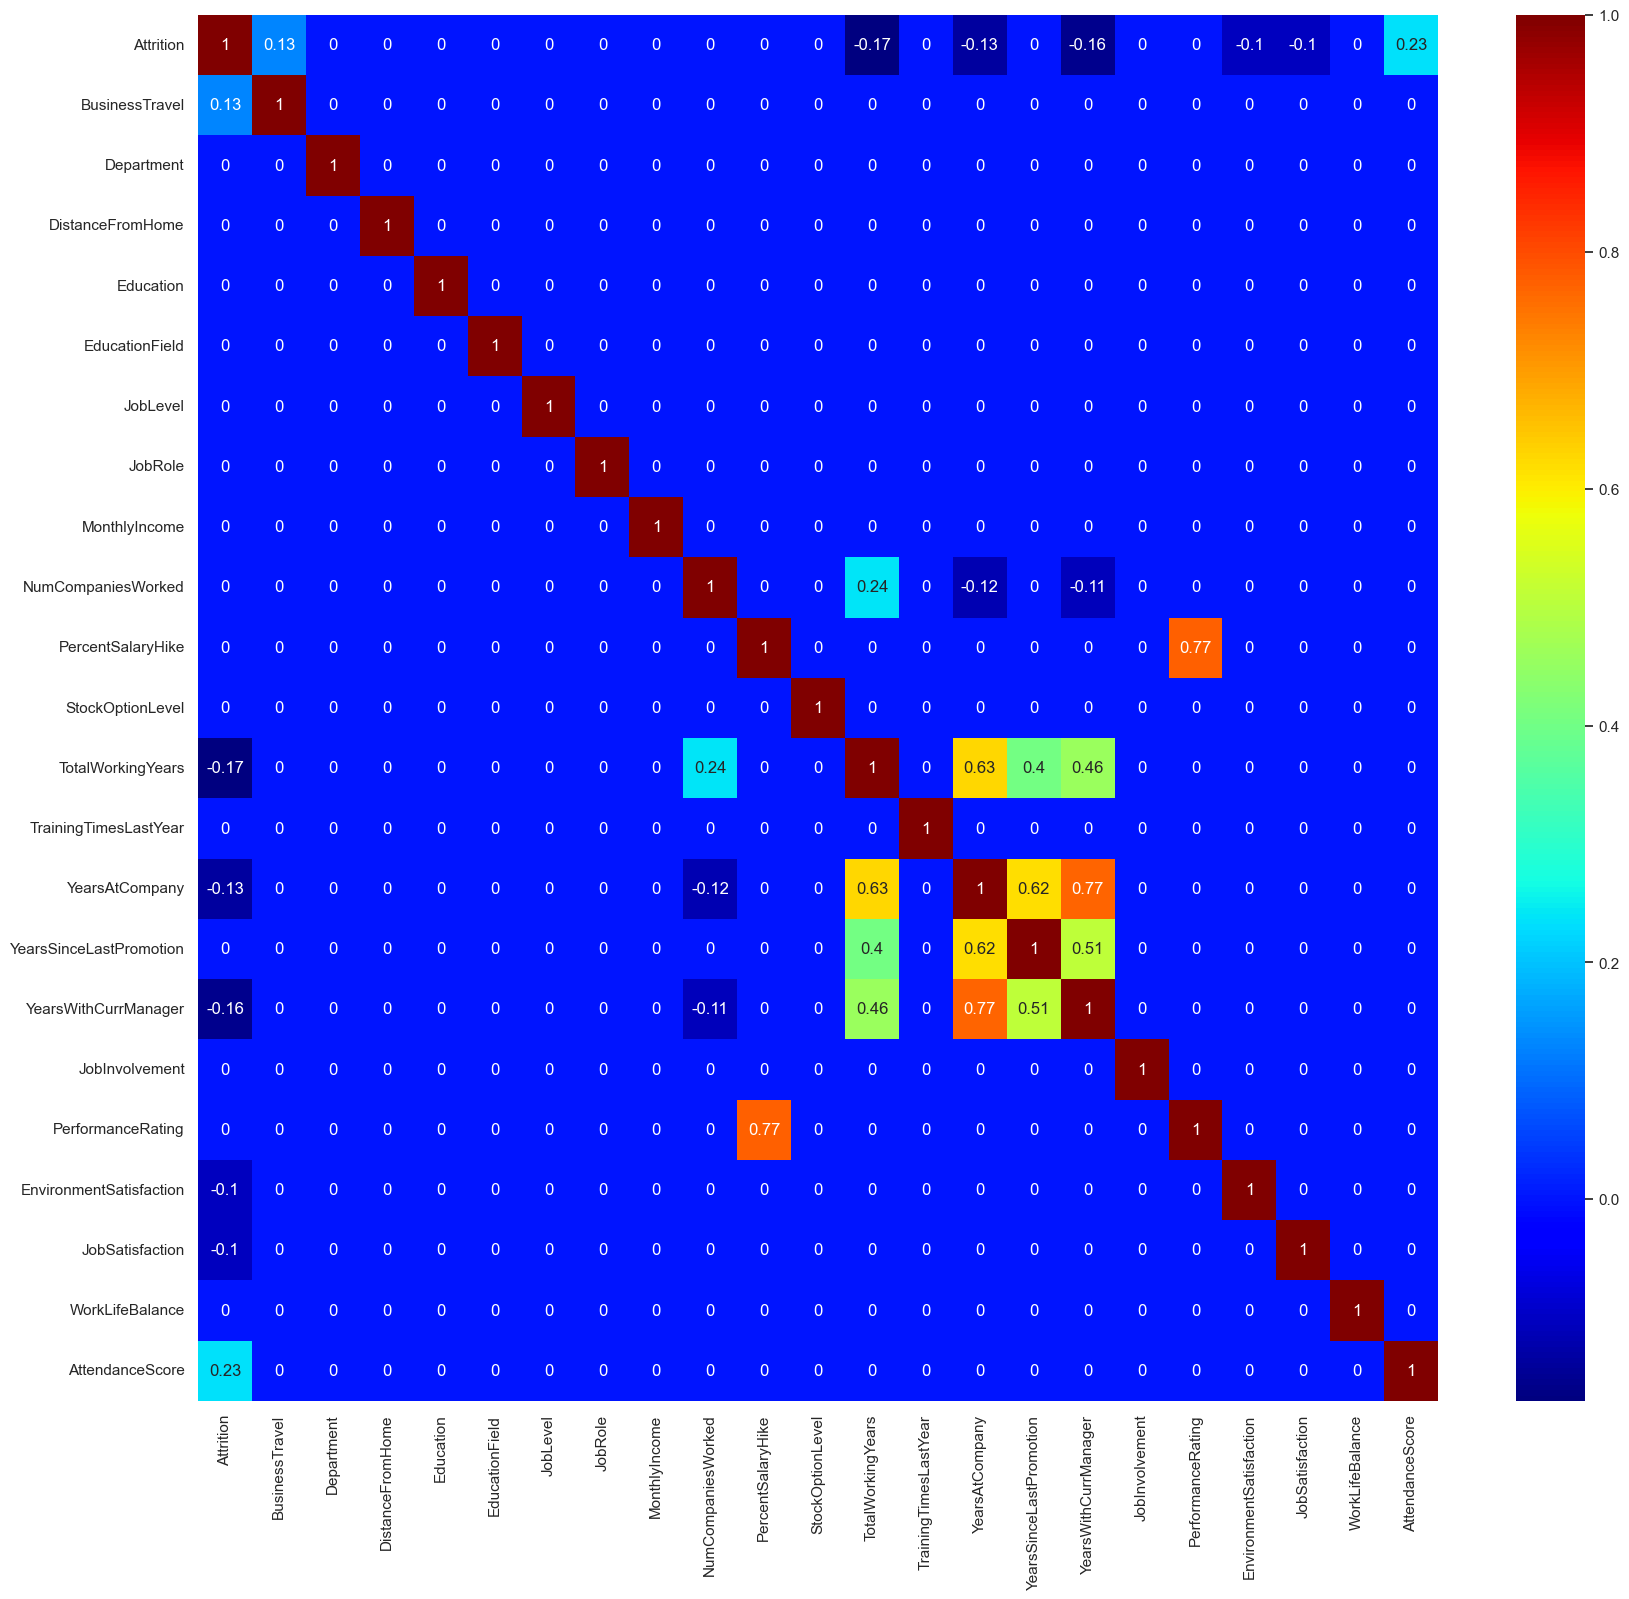

In [86]:
# Set value between -0.1 and 0.1 to 0 to remove noise

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) < 0.1:
            corr_matrix.iloc[i, j] = 0
            
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap=plt.get_cmap("jet"))

In [87]:
# Suppression des colonnes non corrélées

humanForYouCopy.drop("Department", axis=1, inplace=True)
humanForYouCopy.drop("EducationField", axis=1, inplace=True)
humanForYouCopy.drop("JobRole", axis=1, inplace=True)
humanForYouCopy.drop("DistanceFromHome", axis=1, inplace=True)
humanForYouCopy.drop("Education", axis=1, inplace=True)
humanForYouCopy.drop("JobLevel", axis=1, inplace=True)
humanForYouCopy.drop("MonthlyIncome", axis=1, inplace=True)
humanForYouCopy.drop("NumCompaniesWorked", axis=1, inplace=True)
humanForYouCopy.drop("PercentSalaryHike", axis=1, inplace=True)
humanForYouCopy.drop("StockOptionLevel", axis=1, inplace=True)
humanForYouCopy.drop("TrainingTimesLastYear", axis=1, inplace=True)
humanForYouCopy.drop("YearsSinceLastPromotion", axis=1, inplace=True)
humanForYouCopy.drop("JobInvolvement", axis=1, inplace=True)
humanForYouCopy.drop("PerformanceRating", axis=1, inplace=True)
humanForYouCopy.drop("WorkLifeBalance", axis=1, inplace=True)

In [88]:
humanForYouCopy.head()

,Attrition,BusinessTravel,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,AttendanceScore
0,0,1,1.0,1,0,3.0,4.0,0
1,1,2,6.0,5,4,3.0,2.0,42
2,0,2,5.0,5,3,2.0,2.0,0
3,0,0,13.0,8,5,4.0,4.0,0
4,0,1,9.0,6,4,4.0,1.0,115


In [89]:
def save_df_to_blob(dataframe, container_name, blob_name, connection_string):
    blob_io = BytesIO()
    dataframe.to_csv(blob_io, index=False)
    blob_io.seek(0)

    blob_service_client = BlobServiceClient.from_connection_string(connection_string)

    blob_client = blob_service_client.get_container_client(container_name).get_blob_client(blob_name)

    blob_client.upload_blob(blob_io, blob_type="BlockBlob", overwrite=True)

In [90]:
save_df_to_blob(humanForYouCopy, 'data', 'DataCleaned.csv', os.getenv('AZURE_STORAGE_CONNECTION_STRING'))

In [91]:
# Split des données en train et test de façon aléatoire

from sklearn.model_selection import train_test_split

X = humanForYouCopy.drop("Attrition", axis=1)
y = humanForYouCopy["Attrition"]

# Scaler les données

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52, shuffle=True)

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, average_precision_score

auc_pr_scorer = make_scorer(average_precision_score , needs_proba=True)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 4,3,5, 10]
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_classifier, param_grid, cv=10, scoring='recall', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Meilleurs paramètres trouvés: ", grid_search.best_params_)
print("Meilleur score AUC-PR: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

Meilleurs paramètres trouvés:  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Meilleur score AUC-PR:  0.814670296430732


In [94]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, average_precision_score, roc_auc_score

y_pred = best_model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("AUC-PR: ", average_precision_score(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.9761904761904762
AUC-PR:  0.8691087945969755
ROC AUC:  0.9361571308229324
Confusion Matrix: 
 [[739   4]
 [ 17 122]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       743
           1       0.97      0.88      0.92       139

    accuracy                           0.98       882
   macro avg       0.97      0.94      0.95       882
weighted avg       0.98      0.98      0.98       882


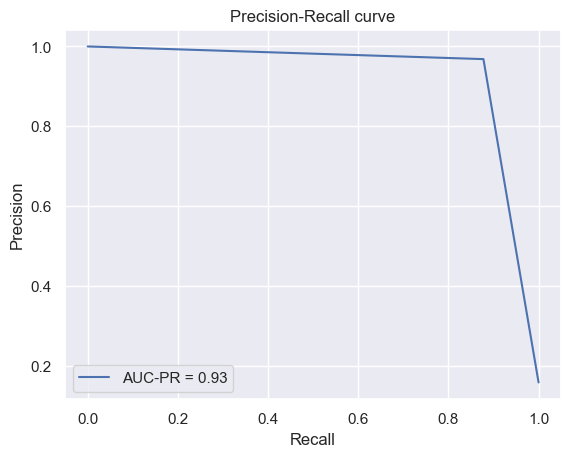

In [95]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

auc_score = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, label=f'AUC-PR = {auc_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="best")
plt.show()